In [13]:
import pandas as pd
import random
from faker import Faker
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Font, Alignment

# Initialize Faker
fake = Faker()

# Number of rows
n = 1500

# Possible values for each field
companies = ["Tata Power", "Reliance Energy", "Adani Green", "NTPC", "JSW Energy", 
             "Suzlon Energy", "ReNew Power", "Hindustan Zinc", "Vedanta", "Essar Power"]

states = ["Maharashtra", "Gujarat", "Rajasthan", "Karnataka", "Tamil Nadu", 
          "Madhya Pradesh", "Andhra Pradesh", "Telangana", "Odisha", "Uttar Pradesh"]

registries = ["Verra", "Gold Standard", "Indian Carbon Registry (ICR)", "Climate Action Reserve"]

project_types = ["Renewable Energy", "Forestry", "Energy Efficiency", "Waste Management", 
                 "Methane Capture", "Cookstove Program", "Industrial Gas Reduction"]

gases = ["CO₂", "CH₄", "N₂O", "HFCs"]

statuses = ["Active", "Registered", "Completed", "Expired"]

# Generate synthetic dataset
data = []
for i in range(1, n+1):
    project_id = f"IN-{10000+i}"
    project_name = f"{random.choice(project_types)} Project at {fake.city()}"
    company = random.choice(companies)
    state = random.choice(states)
    registry = random.choice(registries)
    project_type = random.choice(project_types)
    emission_reductions = random.randint(5000, 500000)   # tonnes CO₂e
    gas = random.choice(gases)
    credits_issued = int(emission_reductions * random.uniform(0.6, 0.95))  # a fraction of reductions
    price = round(random.uniform(2.0, 12.0), 2)  # USD per credit
    status = random.choice(statuses)

    data.append([project_id, project_name, company, state, registry, project_type, 
                 emission_reductions, gas, credits_issued, price, status])

# Create DataFrame
columns = ["Project ID", "Project Name", "Company", "State", "Registry", "Project Type", 
           "Emission Reductions (tCO₂e)", "Gas", "Credits Issued", "Price (USD)", "Status"]
df = pd.DataFrame(data, columns=columns)

# Save DataFrame as clean Excel file
wb = Workbook()
ws = wb.active
ws.title = "Carbon Credits"

# Write DataFrame to worksheet
for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
    for c_idx, value in enumerate(row, 1):
        cell = ws.cell(row=r_idx, column=c_idx, value=value)
        if r_idx == 1:
            cell.font = Font(bold=True)          # Bold headers
            cell.alignment = Alignment(horizontal="center")

# Auto-adjust column widths
for column_cells in ws.columns:
    length = max(len(str(cell.value)) for cell in column_cells)
    ws.column_dimensions[column_cells[0].column_letter].width = length + 2

# Save Excel file
wb.save("1carbon_credits_formatted.xlsx")

print("1500-row dataset created and saved as 'carbon_credits_formatted.xlsx'!")


1500-row dataset created and saved as 'carbon_credits_formatted.xlsx'!


In [7]:
import pandas as pd


In [9]:
df=pd.read_excel(r"C:\Users\GHANWAT\Downloads\1carbon_credits_formatted.xlsx")

In [11]:
df["Price (USD)"]

0        7.35
1        2.18
2        5.29
3       11.32
4        8.33
        ...  
1495     5.24
1496     2.14
1497     3.80
1498     6.21
1499     2.85
Name: Price (USD), Length: 1500, dtype: float64

In [13]:
# Conversion rate
usd_to_inr = 83

# Create new column in INR and drop the USD column
df["Price (INR)"] = (df["Price (USD)"] * usd_to_inr).round(2)
df.drop(columns=["Price (USD)"], inplace=True)

# Check
df[["Price (INR)"]].head()


Price (INR)
0       610.05
1       180.94
2       439.07
3       939.56
4       691.39

In [15]:
df.columns

Index(['Project ID', 'Project Name', 'Company', 'State', 'Registry',
       'Project Type', 'Emission Reductions (tCO₂e)', 'Gas', 'Credits Issued',
       'Status', 'Price (INR)'],
      dtype='object')

In [22]:
df

Project ID                                 Project Name         Company  \
0      IN-10001        Renewable Energy Project at Annehaven     Adani Green   
1      IN-10002   Waste Management Project at Williamchester  Hindustan Zinc   
2      IN-10003    Renewable Energy Project at Reynoldsburgh   Suzlon Energy   
3      IN-10004  Waste Management Project at Port Austinport            NTPC   
4      IN-10005       Methane Capture Project at Amandaburgh     Adani Green   
...         ...                                          ...             ...   
1495   IN-11496  Renewable Energy Project at South Elizabeth     ReNew Power   
1496   IN-11497       Cookstove Program Project at Port Levi            NTPC   
1497   IN-11498       Renewable Energy Project at Garciatown   Suzlon Energy   
1498   IN-11499      Cookstove Program Project at Rojasville     ReNew Power   
1499   IN-11500      Waste Management Project at Harperhaven     Essar Power   

              State                      Registry       Project Type  \
0     Uttar Pradesh        Climate Action Reserve  Energy Efficiency   
1         Karnataka                 Gold Standard           Forestry   
2            Odisha                         Verra   Waste Management   
3         Telangana  Indian Carbon Registry (ICR)    Methane Capture   
4       Maharashtra                         Verra  Energy Efficiency   
...             ...                           ...                ...   
1495     Tamil Nadu        Climate Action Reserve   Waste Management   
1496      Telangana        Climate Action Reserve   Waste Management   
1497         Odisha                         Verra  Energy Efficiency   
1498         Odisha  Indian Carbon Registry (ICR)   Waste Management   
1499         Odisha        Climate Action Reserve    Methane Capture   

      Emission Reductions (tCO₂e)   Gas  Credits Issued      Status  \
0                          131525   CO₂          104580     Expired   
1                          121639   CH₄          113653   Completed   
2                          434615  HFCs          326672      Active   
3                          381252  HFCs          243363   Completed   
4                          270804   CH₄          198541      Active   
...                           ...   ...             ...         ...   
1495                       492740   N₂O          328165  Registered   
1496                        23207   CH₄           21098     Expired   
1497                       229739   N₂O          184042  Registered   
1498                       184579   CH₄          146132   Completed   
1499                        54419   N₂O           43287   Completed   

      Price (INR)  
0          610.05  
1          180.94  
2          439.07  
3          939.56  
4          691.39  
...           ...  
1495       434.92  
1496       177.62  
1497       315.40  
1498       515.43  
1499       236.55  

[1500 rows x 11 columns]

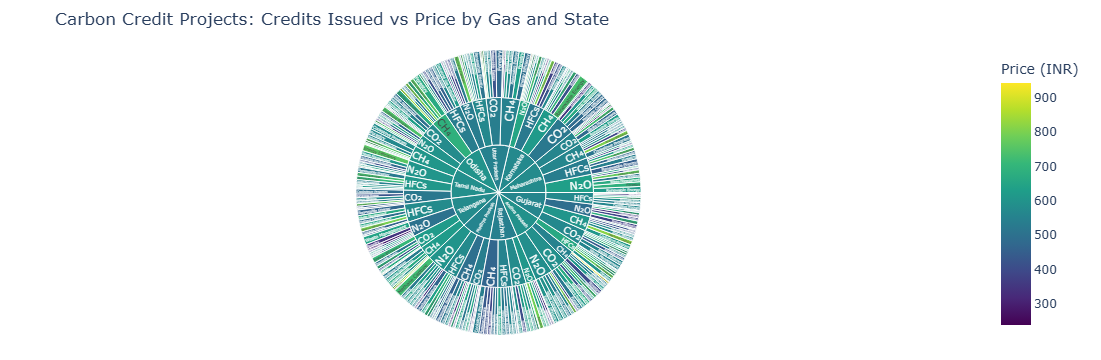

In [17]:
import plotly.express as px

# Sunburst: State -> Gas -> Project Type
fig = px.sunburst(
    df,
    path=['State', 'Gas', 'Project Type'],  # Hierarchy
    values='Credits Issued',                # Size of sectors
    color='Price (INR)',                    # Color by price
    color_continuous_scale='Viridis',       # Color scale
    hover_data=['Project Name', 'Company', 'Credits Issued', 'Price (INR)']
)

fig.update_layout(
    title="Carbon Credit Projects: Credits Issued vs Price by Gas and State",
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()


C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_12204\3483660351.py:25: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_12204\3483660351.py:25: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\GHANWAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\GHANWAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.



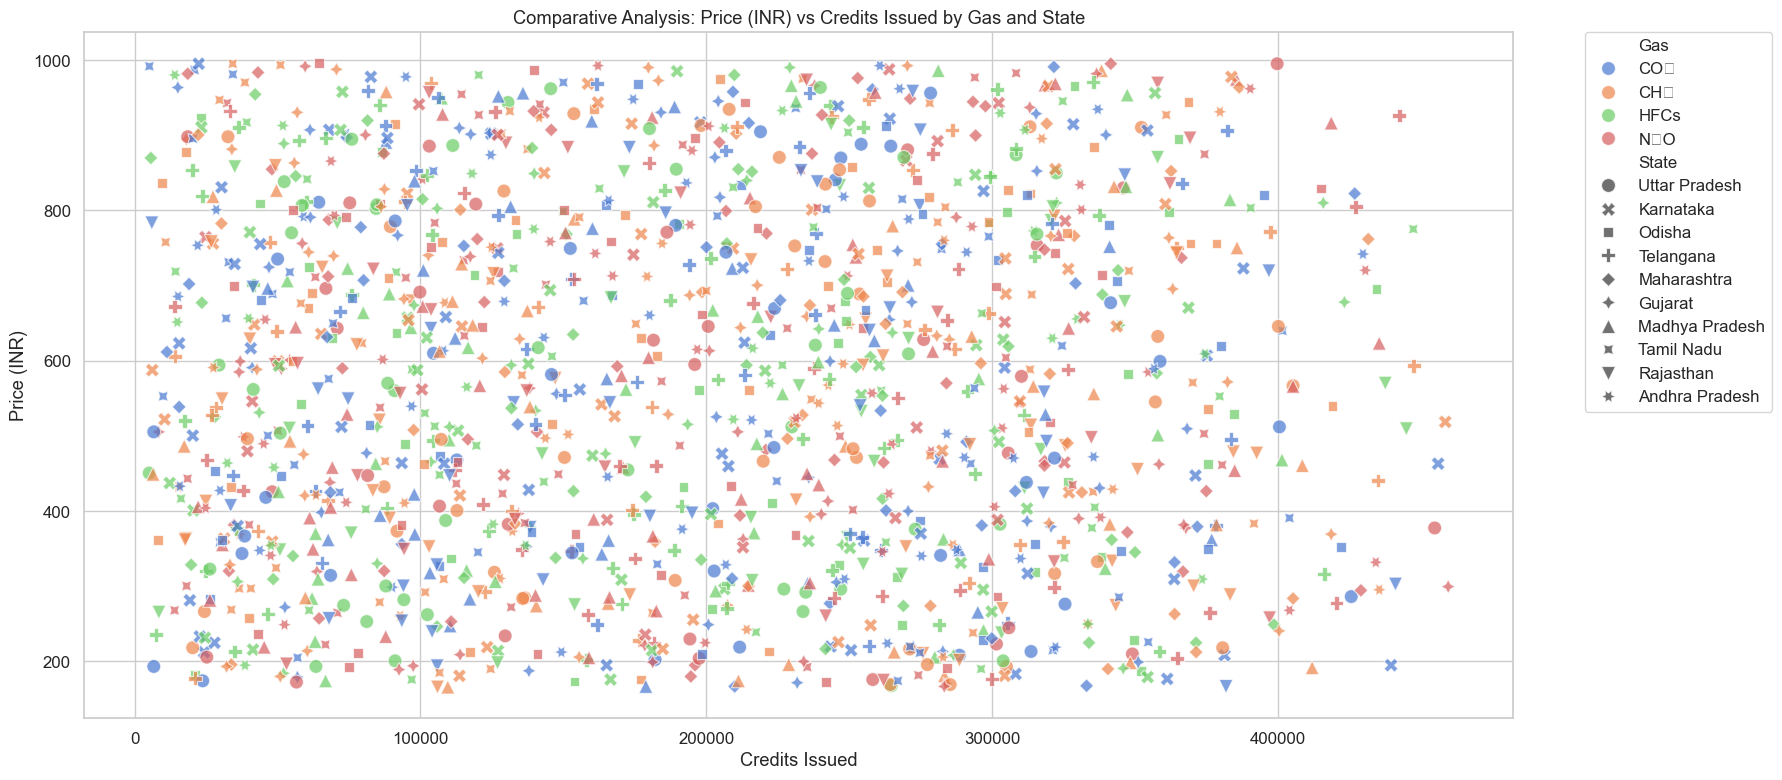

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Create a figure
plt.figure(figsize=(18,8))

# Scatter plot: Price vs Credits Issued, hue by Gas, style by State
sns.scatterplot(
    data=df,
    x="Credits Issued",
    y="Price (INR)",
    hue="Gas",
    style="State",
    s=100,  # size of markers
    alpha=0.7
)

plt.title("Comparative Analysis: Price (INR) vs Credits Issued by Gas and State")
plt.xlabel("Credits Issued")
plt.ylabel("Price (INR)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_12204\1285066821.py:42: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_12204\1285066821.py:42: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\GHANWAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\GHANWAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.



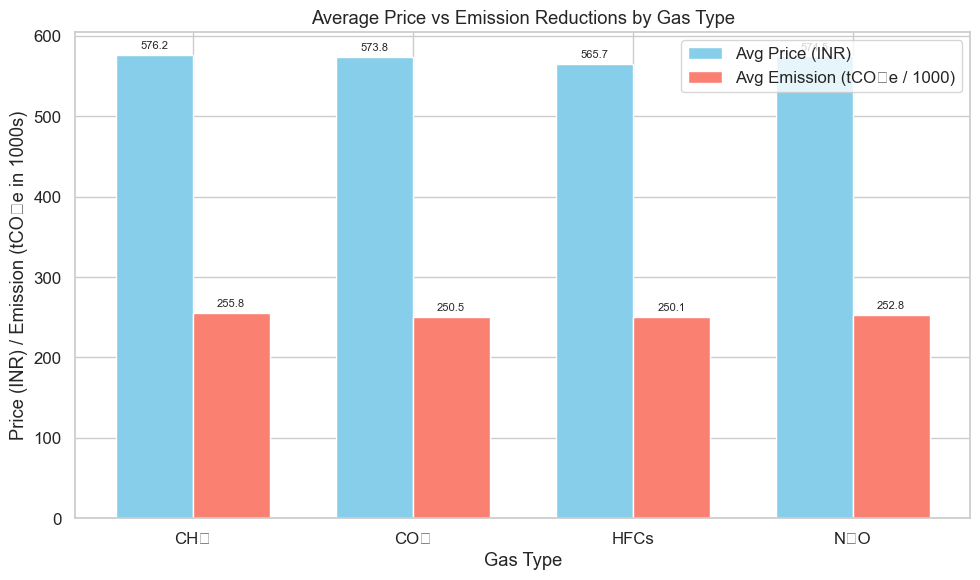

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aggregate data: average Price and Emission per Gas
agg_df = df.groupby("Gas")[["Price (INR)", "Emission Reductions (tCO₂e)"]].mean().reset_index()

# Set positions
x = np.arange(len(agg_df["Gas"]))
width = 0.35  # width of the bars

# Create bar chart
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar for Price
bars1 = ax1.bar(x - width/2, agg_df["Price (INR)"], width, label="Avg Price (INR)", color="skyblue")

# Bar for Emission Reductions
bars2 = ax1.bar(x + width/2, agg_df["Emission Reductions (tCO₂e)"]/1000, width, label="Avg Emission (tCO₂e / 1000)", color="salmon")

# Labels and title
ax1.set_xlabel("Gas Type")
ax1.set_ylabel("Price (INR) / Emission (tCO₂e in 1000s)")
ax1.set_title("Average Price vs Emission Reductions by Gas Type")
ax1.set_xticks(x)
ax1.set_xticklabels(agg_df["Gas"])
ax1.legend()

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.1f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0,3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


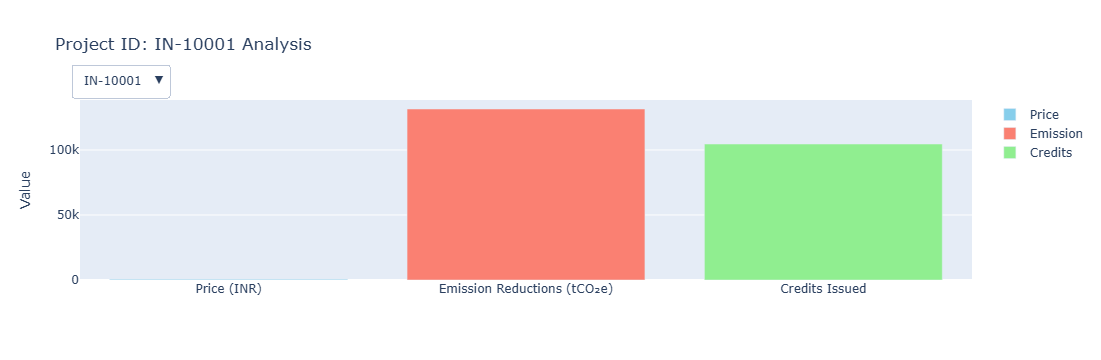

In [28]:

# Prepare dropdown options
project_ids = df["Project ID"].tolist()

# Initialize figure with first project
initial_id = project_ids[0]
filtered_df = df[df["Project ID"] == initial_id]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Price (INR)'],
    y=filtered_df['Price (INR)'],
    name='Price',
    marker_color='skyblue'
))
fig.add_trace(go.Bar(
    x=['Emission Reductions (tCO₂e)'],
    y=filtered_df['Emission Reductions (tCO₂e)'],
    name='Emission',
    marker_color='salmon'
))
fig.add_trace(go.Bar(
    x=['Credits Issued'],
    y=filtered_df['Credits Issued'],
    name='Credits',
    marker_color='lightgreen'
))

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label=pid,
                    method="update",
                    args=[{"y": [
                        df[df["Project ID"]==pid]['Price (INR)'],
                        df[df["Project ID"]==pid]['Emission Reductions (tCO₂e)'],
                        df[df["Project ID"]==pid]['Credits Issued']
                    ]},
                    {"title": f"Project ID: {pid} Analysis"}]
                ) for pid in project_ids
            ],
            direction="down",
            x=0.1,
            y=1.2
        )
    ]
)

fig.update_layout(
    title=f"Project ID: {initial_id} Analysis",
    yaxis_title="Value",
    barmode='group'
)

fig.show()


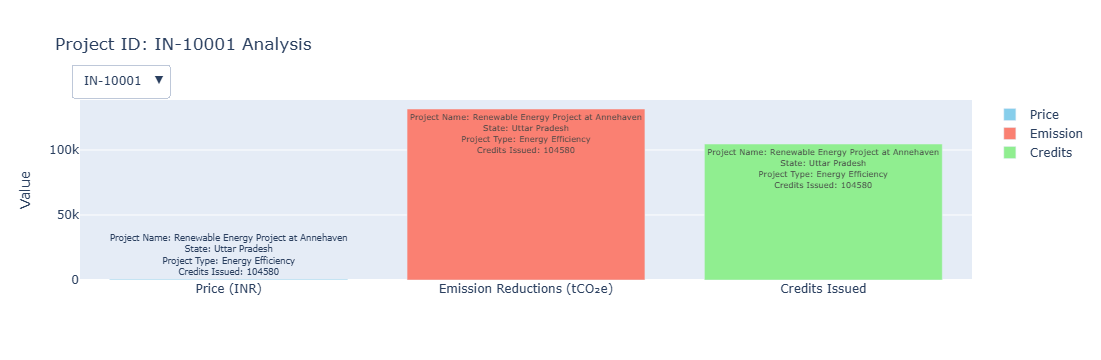

In [36]:

# Prepare dropdown options
project_ids = df["Project ID"].tolist()

# Initialize figure with first project
initial_id = project_ids[0]
filtered_df = df[df["Project ID"] == initial_id]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Price (INR)'],
    y=filtered_df['Price (INR)'],
    name='Price',
    marker_color='skyblue',
    text=[f"Project Name: {filtered_df['Project Name'].values[0]}<br>"
          f"State: {filtered_df['State'].values[0]}<br>"
          f"Project Type: {filtered_df['Project Type'].values[0]}<br>"
          f"Credits Issued: {filtered_df['Credits Issued'].values[0]}"],
    hoverinfo="text+y"
))

fig.add_trace(go.Bar(
    x=['Emission Reductions (tCO₂e)'],
    y=filtered_df['Emission Reductions (tCO₂e)'],
    name='Emission',
    marker_color='salmon',
    text=[f"Project Name: {filtered_df['Project Name'].values[0]}<br>"
          f"State: {filtered_df['State'].values[0]}<br>"
          f"Project Type: {filtered_df['Project Type'].values[0]}<br>"
          f"Credits Issued: {filtered_df['Credits Issued'].values[0]}"],
    hoverinfo="text+y"
))

fig.add_trace(go.Bar(
    x=['Credits Issued'],
    y=filtered_df['Credits Issued'],
    name='Credits',
    marker_color='lightgreen',
    text=[f"Project Name: {filtered_df['Project Name'].values[0]}<br>"
          f"State: {filtered_df['State'].values[0]}<br>"
          f"Project Type: {filtered_df['Project Type'].values[0]}<br>"
          f"Credits Issued: {filtered_df['Credits Issued'].values[0]}"],
    hoverinfo="text+y"
))

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label=pid,
                    method="update",
                    args=[{"y": [
                        df[df["Project ID"]==pid]['Price (INR)'],
                        df[df["Project ID"]==pid]['Emission Reductions (tCO₂e)'],
                        df[df["Project ID"]==pid]['Credits Issued']
                    ],
                    "text": [
                        [f"Project Name: {df[df['Project ID']==pid]['Project Name'].values[0]}<br>"
                         f"State: {df[df['Project ID']==pid]['State'].values[0]}<br>"
                         f"Project Type: {df[df['Project ID']==pid]['Project Type'].values[0]}<br>"
                         f"Credits Issued: {df[df['Project ID']==pid]['Credits Issued'].values[0]}"],
                        [f"Project Name: {df[df['Project ID']==pid]['Project Name'].values[0]}<br>"
                         f"State: {df[df['Project ID']==pid]['State'].values[0]}<br>"
                         f"Project Type: {df[df['Project ID']==pid]['Project Type'].values[0]}<br>"
                         f"Credits Issued: {df[df['Project ID']==pid]['Credits Issued'].values[0]}"],
                        [f"Project Name: {df[df['Project ID']==pid]['Project Name'].values[0]}<br>"
                         f"State: {df[df['Project ID']==pid]['State'].values[0]}<br>"
                         f"Project Type: {df[df['Project ID']==pid]['Project Type'].values[0]}<br>"
                         f"Credits Issued: {df[df['Project ID']==pid]['Credits Issued'].values[0]}"]
                    ]},
                    {"title": f"Project ID: {pid} Analysis"}]
                ) for pid in project_ids
            ],
            direction="down",
            x=0.1,
            y=1.2
        )
    ]
)

fig.update_layout(
    title=f"Project ID: {initial_id} Analysis",
    yaxis_title="Value",
    barmode='group'
)

fig.show()


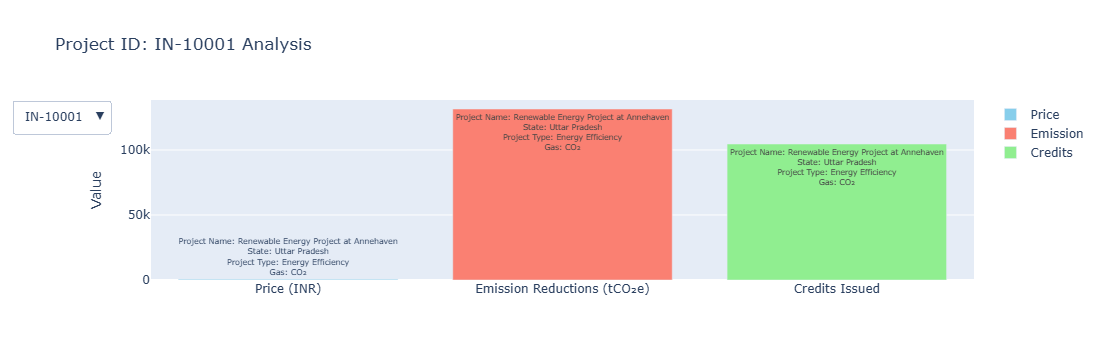

In [42]:


# Initial project (or aggregated first row)
initial_df = df.iloc[0]

def get_aggregated_values(selected_project=None, selected_state=None, selected_gas=None, selected_type=None):
    # Filter
    temp_df = df.copy()
    if selected_project:
        temp_df = temp_df[temp_df["Project ID"] == selected_project]
    if selected_state:
        temp_df = temp_df[temp_df["State"] == selected_state]
    if selected_gas:
        temp_df = temp_df[temp_df["Gas"] == selected_gas]
    if selected_type:
        temp_df = temp_df[temp_df["Project Type"] == selected_type]
    
    # Aggregate: mean for Price, sum for Emission and Credits
    price = temp_df['Price (INR)'].mean()
    emission = temp_df['Emission Reductions (tCO₂e)'].sum()
    credits = temp_df['Credits Issued'].sum()
    
    # For hover, just show first project info (optional)
    hover_text = (f"Project Name: {temp_df['Project Name'].values[0] if len(temp_df)>0 else 'N/A'}<br>"
                  f"State: {temp_df['State'].values[0] if len(temp_df)>0 else 'N/A'}<br>"
                  f"Project Type: {temp_df['Project Type'].values[0] if len(temp_df)>0 else 'N/A'}<br>"
                  f"Gas: {temp_df['Gas'].values[0] if len(temp_df)>0 else 'N/A'}")
    
    return price, emission, credits, hover_text

# Initial values
price, emission, credits, hover_text = get_aggregated_values(selected_project=initial_df["Project ID"])

# Create figure
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Price (INR)'],
    y=[price],
    name='Price',
    marker_color='skyblue',
    text=[hover_text],
    hoverinfo="text+y"
))

fig.add_trace(go.Bar(
    x=['Emission Reductions (tCO₂e)'],
    y=[emission],
    name='Emission',
    marker_color='salmon',
    text=[hover_text],
    hoverinfo="text+y"
))

fig.add_trace(go.Bar(
    x=['Credits Issued'],
    y=[credits],
    name='Credits',
    marker_color='lightgreen',
    text=[hover_text],
    hoverinfo="text+y"
))

# Dropdown example for Project ID (you can add more like State, Gas, Type similarly)
project_ids = df["Project ID"].unique()
buttons = []
for pid in project_ids:
    p, e, c, h = get_aggregated_values(selected_project=pid)
    buttons.append(dict(
        label=pid,
        method="update",
        args=[{"y": [[p],[e],[c]], "text": [[h],[h],[h]]},
              {"title": f"Project ID: {pid} Analysis"}]
    ))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons)],
    title=f"Project ID: {initial_df['Project ID']} Analysis",
    yaxis_title="Value",
    barmode='group'
)

fig.show()


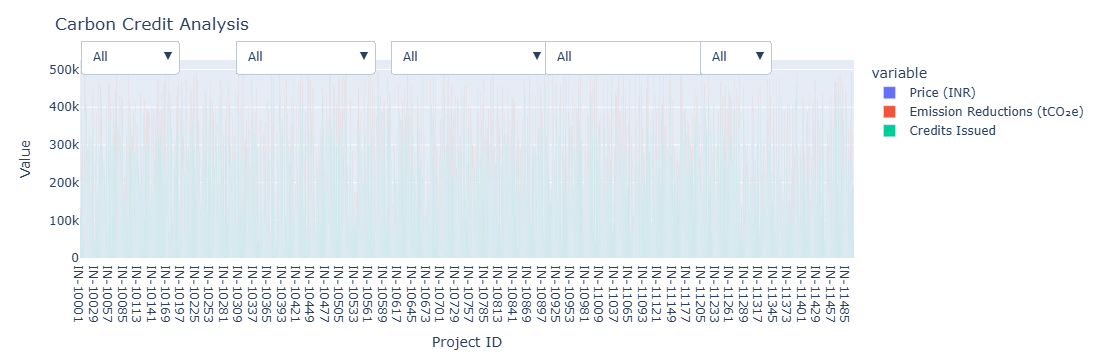

In [50]:


# If you have City in another column, make sure it's present in df
# For demo, we extract city from project name
df['City'] = df['Project Name'].apply(lambda x: x.split()[-1])

# Create initial figure (all data aggregated by Gas)
fig = px.bar(
    df,
    x='Project ID',
    y=['Price (INR)', 'Emission Reductions (tCO₂e)', 'Credits Issued'],
    barmode='group',
    hover_data=['Project Name', 'State', 'City', 'Project Type', 'Gas']
)

# Add dropdown filters
dropdowns = [
    dict(
        buttons=[dict(label="All", method="update", args=[{"visible": [True]*len(df)}, {"title": "All Projects"}])] +
                [dict(
                    label=pid,
                    method="update",
                    args=[{"x": [df[df['Project ID']==pid]['Project ID']] * 3,
                           "y": [df[df['Project ID']==pid]['Price (INR)'],
                                 df[df['Project ID']==pid]['Emission Reductions (tCO₂e)'],
                                 df[df['Project ID']==pid]['Credits Issued']]
                          },
                          {"title": f"Project ID: {pid}"}]
                ) for pid in df['Project ID'].unique()],
        direction="down",
        x=0, y=1.15, showactive=True, pad={"r":10,"t":10}, xanchor="left", yanchor="top"
    ),
    dict(
        buttons=[dict(label="All", method="update", args=[{"visible": [True]*len(df)}, {"title": "All States"}])] +
                [dict(
                    label=state,
                    method="update",
                    args=[{"x": [df[df['State']==state]['Project ID']] * 3,
                           "y": [df[df['State']==state]['Price (INR)'],
                                 df[df['State']==state]['Emission Reductions (tCO₂e)'],
                                 df[df['State']==state]['Credits Issued']]
                          },
                          {"title": f"State: {state}"}]
                ) for state in df['State'].unique()],
        direction="down",
        x=0.2, y=1.15, showactive=True, pad={"r":10,"t":10}, xanchor="left", yanchor="top"
    ),
    dict(
        buttons=[dict(label="All", method="update", args=[{"visible": [True]*len(df)}, {"title": "All Cities"}])] +
                [dict(
                    label=city,
                    method="update",
                    args=[{"x": [df[df['City']==city]['Project ID']] * 3,
                           "y": [df[df['City']==city]['Price (INR)'],
                                 df[df['City']==city]['Emission Reductions (tCO₂e)'],
                                 df[df['City']==city]['Credits Issued']]
                          },
                          {"title": f"City: {city}"}]
                ) for city in df['City'].unique()],
        direction="down",
        x=0.4, y=1.15, showactive=True, pad={"r":10,"t":10}, xanchor="left", yanchor="top"
    ),
    dict(
        buttons=[dict(label="All", method="update", args=[{"visible": [True]*len(df)}, {"title": "All Project Types"}])] +
                [dict(
                    label=ptype,
                    method="update",
                    args=[{"x": [df[df['Project Type']==ptype]['Project ID']] * 3,
                           "y": [df[df['Project Type']==ptype]['Price (INR)'],
                                 df[df['Project Type']==ptype]['Emission Reductions (tCO₂e)'],
                                 df[df['Project Type']==ptype]['Credits Issued']]
                          },
                          {"title": f"Project Type: {ptype}"}]
                ) for ptype in df['Project Type'].unique()],
        direction="down",
        x=0.6, y=1.15, showactive=True, pad={"r":10,"t":10}, xanchor="left", yanchor="top"
    ),
    dict(
        buttons=[dict(label="All", method="update", args=[{"visible": [True]*len(df)}, {"title": "All Gas"}])] +
                [dict(
                    label=gas,
                    method="update",
                    args=[{"x": [df[df['Gas']==gas]['Project ID']] * 3,
                           "y": [df[df['Gas']==gas]['Price (INR)'],
                                 df[df['Gas']==gas]['Emission Reductions (tCO₂e)'],
                                 df[df['Gas']==gas]['Credits Issued']]
                          },
                          {"title": f"Gas: {gas}"}]
                ) for gas in df['Gas'].unique()],
        direction="down",
        x=0.8, y=1.15, showactive=True, pad={"r":10,"t":10}, xanchor="left", yanchor="top"
    )
]

fig.update_layout(
    updatemenus=dropdowns,
    title="Carbon Credit Analysis",
    yaxis_title="Value",
    xaxis_title="Project ID",
    barmode='group'
)

fig.show()
